In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

# Importing the dataset

We have exported our train set and test set into pickle files. Now, we just have to import them

In [2]:
CATEGORIES = ["Chinese Temple", "Hindu Temple", "Mosque"]

In [3]:
import pickle

pickle_in = open("train_set.pickle","rb")
train_set = pickle.load(pickle_in)

pickle_in = open("test_set.pickle","rb")
test_set = pickle.load(pickle_in)

In [4]:
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (76, 2)
Test set shape: (19, 2)


In [5]:
X_train = []
y_train = []

for features,label in train_set:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_test = []
y_test = []

for features,label in test_set:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test)
y_test = np.array(y_test)

### Let's view the training set and testing set to verify that we have imported the dataset correctly

#### Train set

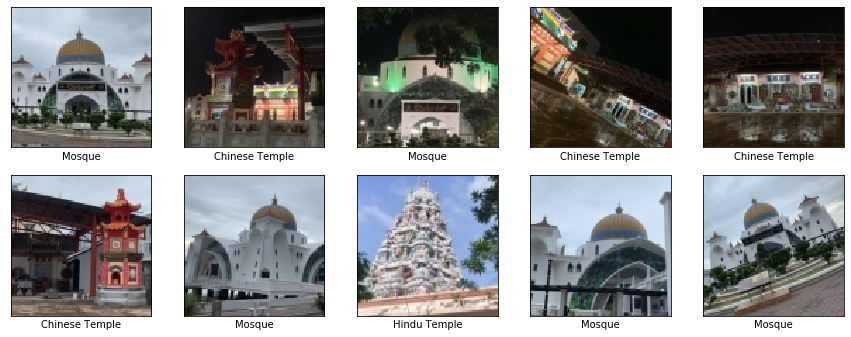

In [7]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_set[i][0])
  plt.xlabel(CATEGORIES[train_set[i][1]])
plt.show()

#### Test set

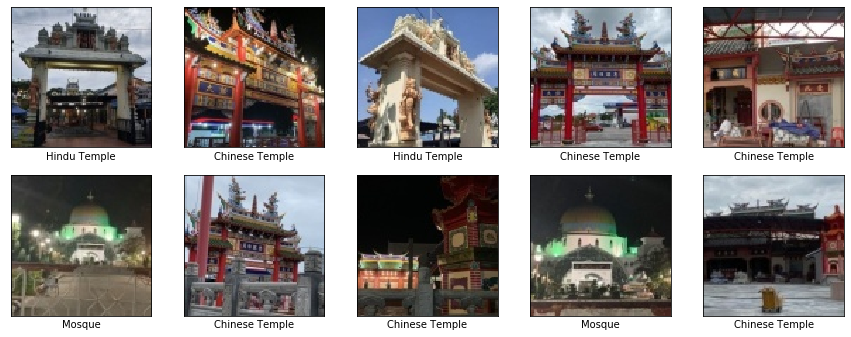

In [8]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_set[i][0])
  plt.xlabel(CATEGORIES[test_set[i][1]])
plt.show()

## Let's start to perform feature extraction using PCA

In [9]:
X_train = X_train.reshape(len(X_train), 30000)
X_test = X_test.reshape(len(X_test), 30000)

In [10]:
from sklearn.decomposition import PCA
n_components = 50

# Extracting the top 50 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [58]:
pickle_out = open("pca.pickle","wb")
pickle.dump(pca, pickle_out)
pickle_out.close()

In [11]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# Fit to the training data
scaler.fit(X_train_pca)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
pickle_out = open("scaler.pickle","wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [13]:
X_train = scaler.transform(X_train_pca)
X_test = scaler.transform(X_test_pca)

In [14]:
# Train the model
from sklearn.neural_network import MLPClassifier
# Create a model 
mlp = MLPClassifier(hidden_layer_sizes=(120,110,100),random_state=85)
# Fit training data to model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(120, 110, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=85, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
# Use neural network to help us do prediction/classification
predictions = mlp.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

# 0 is Hindu Temple, 1 is Mosque, 2 is Chinese Temple 

[[11  0  0]
 [ 0  2  1]
 [ 2  0  3]]


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.67      0.80         3
           2       0.75      0.60      0.67         5

    accuracy                           0.84        19
   macro avg       0.87      0.76      0.79        19
weighted avg       0.85      0.84      0.83        19



In [55]:
pickle_out = open("mlp_classifier.pickle","wb")
pickle.dump(mlp, pickle_out)
pickle_out.close()